In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
seed=pd.read_csv("Desktop/eda/Seed_Data.csv",header=None,names=['Area','Perimeter','Compactness','Length_K','Width_K','Asymmety_Coef','Length_K_Groove','Class'])

### To construct the data, seven geometric parameters of wheat kernels were measured:

     area A,
     perimeter P,
     compactness C = 4piA/P^2,
     length of kernel,
     width of kernel,
     asymmetry coefficient
     length of kernel groove
### Data Set Information:
The examined group comprised kernels belonging to three different varieties of wheat:<b> Kama, Rosa and Canadian, 70 </b>elements each, randomly selected for the experiment.

In [3]:
seed.head()

,Area,Perimeter,Compactness,Length_K,Width_K,Asymmety_Coef,Length_K_Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [4]:
seed.Class.unique(),seed.Class.value_counts()

(array([0, 1, 2], dtype=int64),
 2    70
 1    70
 0    70
 Name: Class, dtype: int64)

In [5]:
seed.shape

(210, 8)

In [6]:
seed.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Length_K           0
Width_K            0
Asymmety_Coef      0
Length_K_Groove    0
Class              0
dtype: int64

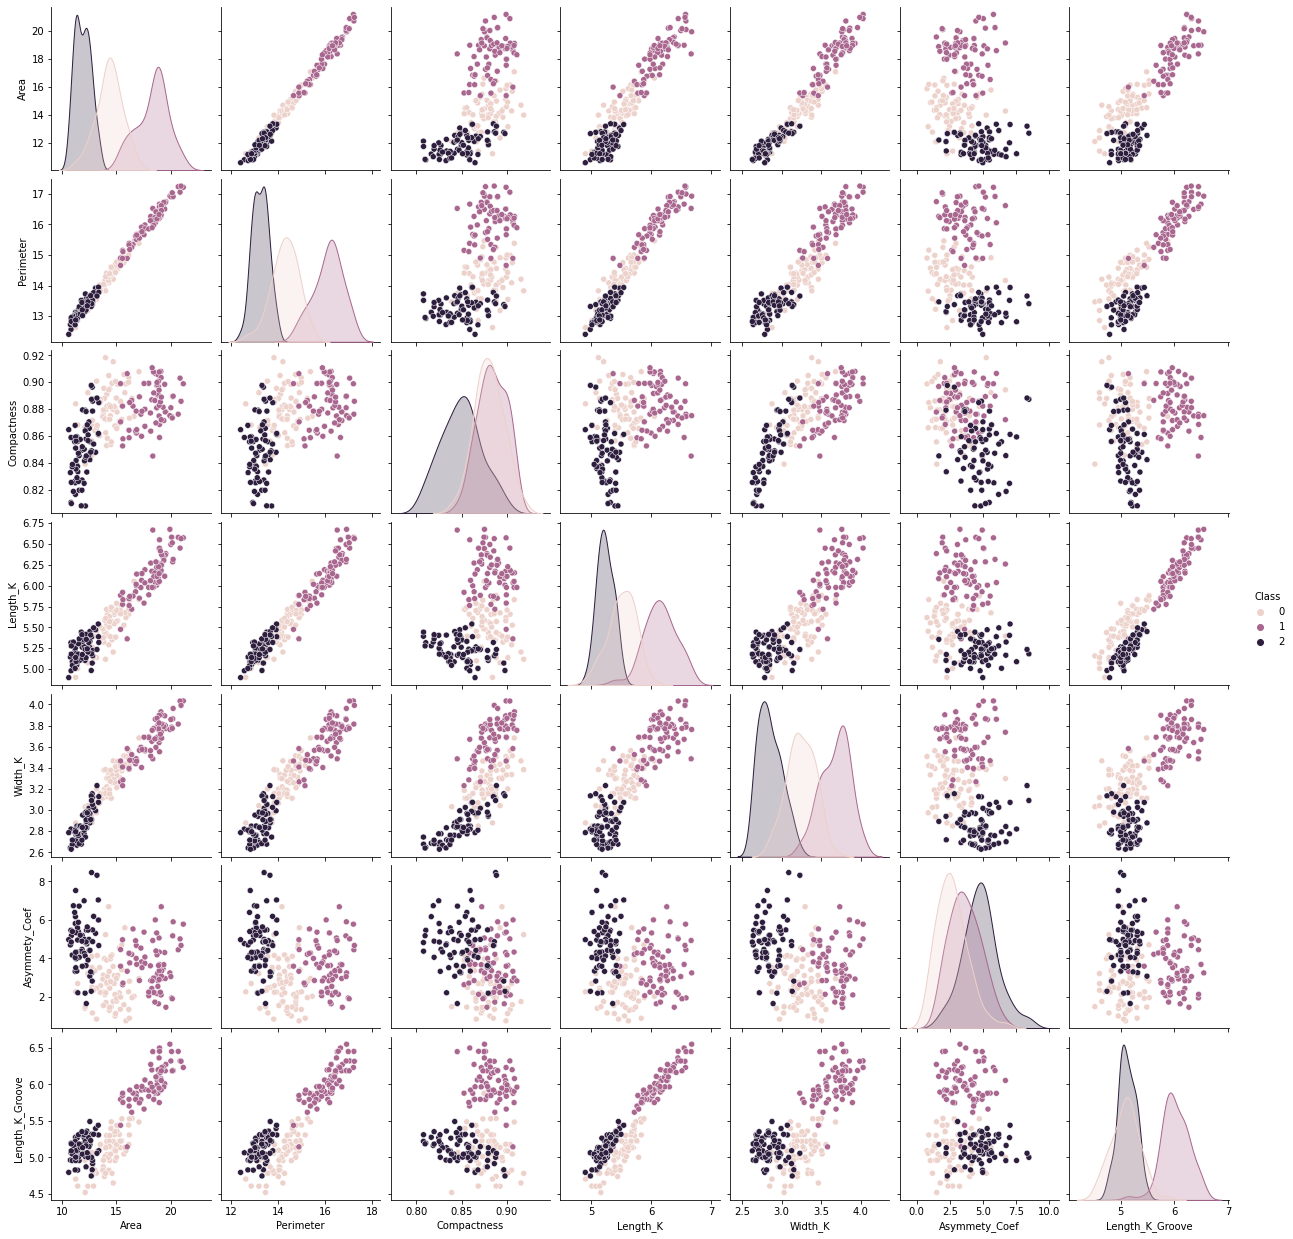

In [7]:
sns.pairplot(seed,hue='Class')

In [8]:
seed.describe()

,Area,Perimeter,Compactness,Length_K,Width_K,Asymmety_Coef,Length_K_Groove,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


In [9]:
seed.corr()

,Area,Perimeter,Compactness,Length_K,Width_K,Asymmety_Coef,Length_K_Groove,Class
Area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
Perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
Compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
Length_K,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
Width_K,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
Asymmety_Coef,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
Length_K_Groove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
Class,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


<AxesSubplot:xlabel='Class', ylabel='Area'>

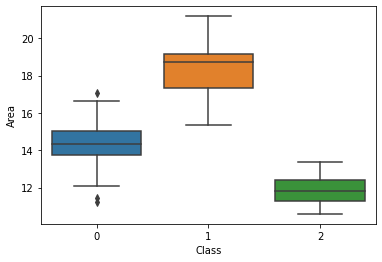

In [10]:
sns.boxplot(seed.Class,seed.Area)

<AxesSubplot:xlabel='Class', ylabel='Length_K_Groove'>

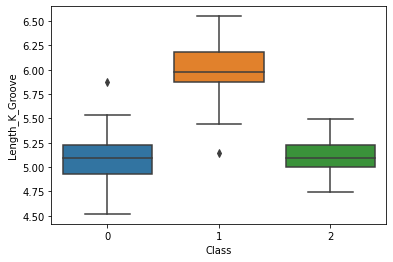

In [11]:
sns.boxplot(seed.Class,seed.Length_K_Groove)

<AxesSubplot:xlabel='Class', ylabel='Perimeter'>

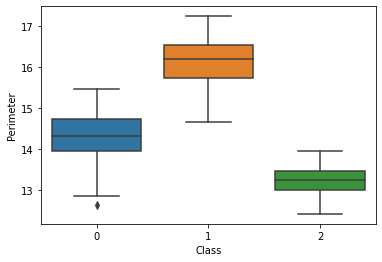

In [12]:
sns.boxplot(seed.Class,seed.Perimeter)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler=StandardScaler()

In [15]:
X=seed.drop('Class',axis=1)
y=seed['Class']

In [16]:
X.shape,y.shape

((210, 7), (210,))

In [18]:
scaled=scaler.fit_transform(X)

In [19]:
X_std=pd.DataFrame(scaled,columns=X.columns)

In [20]:
X_std.head()

,Area,Perimeter,Compactness,Length_K,Width_K,Asymmety_Coef,Length_K_Groove
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356


In [22]:
from sklearn.cluster import AgglomerativeClustering
ag=AgglomerativeClustering(n_clusters=3)
xpred=ag.fit_predict(X_std)
X_std['class']=xpred

In [23]:
#three eucledian with ward
X_std['class'].value_counts()

0    73
1    70
2    67
Name: class, dtype: int64

In [24]:

from scipy.spatial.distance import pdist

In [26]:

pdist(X_std)

array([1.18468792, 2.1020544 , 1.8793056 , ..., 3.70275352, 2.12741273,
       1.58755829])

In [28]:
#Mean of each column and centroid of each column
c0=np.mean(X_std.iloc[:,:-1],axis=0)
c0

Area              -5.392512e-17
Perimeter          9.146123e-17
Compactness        1.406679e-15
Length_K          -2.214631e-15
Width_K           -3.172066e-16
Asymmety_Coef     -2.082990e-16
Length_K_Groove   -9.992007e-17
dtype: float64

In [29]:
np.sqrt(np.sum(np.square(X_std.iloc[0]-X_std.iloc[2])))

2.1020543987077382

In [30]:
np.sqrt(np.sum(np.square(X_std.iloc[0]-X_std.iloc[2])))

2.1020543987077382

In [32]:
grp=X_std.groupby(['class'])
df0=grp.get_group(0)
df1=grp.get_group(1)
df2=grp.get_group(2)

In [33]:
df0.shape,df1.shape,df2.shape

((73, 8), (70, 8), (67, 8))

Area              -0.223402
Perimeter         -0.250010
Compactness        0.347508
Length_K          -0.340041
Width_K           -0.085328
Asymmety_Coef     -0.725360
Length_K_Groove   -0.656511
dtype: float64

In [36]:
#Centroid of second Cluster
c1=df1.mean()
c1=c1[:-1]
c1

Area               1.213983
Perimeter          1.217445
Compactness        0.568505
Length_K           1.198256
Width_K            1.130594
Asymmety_Coef     -0.040697
Length_K_Groove    1.242686
dtype: float64

In [45]:
#Centroid of Third Cluster
c2=df2.mean()
c2=c2[:-1]
c2

Area              -1.024932
Perimeter         -0.999559
Compactness       -0.972589
Length_K          -0.881418
Width_K           -1.088249
Asymmety_Coef      0.832836
Length_K_Groove   -0.583025
dtype: float64

In [48]:
#We have no direct formulae for inertia .So we are calculating manually.
#sum((every record - centroid)**2)
I0,I1,I2=0,0,0
for i in np.arange(df0.shape[0]):
    I0=I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
    I1=I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):
    I2=I2+np.sum((df2.iloc[i,:-1]-c2)**2)

In [49]:
total_inertia=I0+I1+I2
total_inertia

445.04904836789296

In [50]:
from sklearn.cluster import AgglomerativeClustering
ag=AgglomerativeClustering(n_clusters=3,linkage='single')
xpred=ag.fit_predict(X_std)
X_std['class']=xpred
#three eucledian with ward
X_std['class'].value_counts()
#Mean of each column and centroid of each column
c0=np.mean(X_std.iloc[:,:-1],axis=0)
np.sqrt(np.sum(np.square(X_std.iloc[0]-X_std.iloc[2])))
grp=X_std.groupby(['class'])
df0=grp.get_group(0)
df1=grp.get_group(1)
df2=grp.get_group(2)
df0.shape,df1.shape,df2.shape
#Centroid of first Cluster
c0=df0.mean()
c0=c0[:-1]
#Centroid of second Cluster
c1=df1.mean()
c1=c1[:-1]
#Centroid of Third Cluster
c2=df2.mean()
c2=c2[:-1]
#We have no direct formulae for inertia .So we are calculating manually.
#sum((every record - centroid)**2)
I0,I1,I2=0,0,0
for i in np.arange(df0.shape[0]):
    I0=I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
    I1=I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):
    I2=I2+np.sum((df2.iloc[i,:-1]-c2)**2)
total_inertia=I0+I1+I2
total_inertia

862.0360832189031

In [51]:
from sklearn.cluster import AgglomerativeClustering
ag=AgglomerativeClustering(n_clusters=3,linkage='average',affinity='euclidean')
xpred=ag.fit_predict(X_std)
X_std['class']=xpred
#three eucledian with ward
X_std['class'].value_counts()
#Mean of each column and centroid of each column
c0=np.mean(X_std.iloc[:,:-1],axis=0)
np.sqrt(np.sum(np.square(X_std.iloc[0]-X_std.iloc[2])))
grp=X_std.groupby(['class'])
df0=grp.get_group(0)
df1=grp.get_group(1)
df2=grp.get_group(2)
df0.shape,df1.shape,df2.shape
#Centroid of first Cluster
c0=df0.mean()
c0=c0[:-1]
#Centroid of second Cluster
c1=df1.mean()
c1=c1[:-1]
#Centroid of Third Cluster
c2=df2.mean()
c2=c2[:-1]
#We have no direct formulae for inertia .So we are calculating manually.
#sum((every record - centroid)**2)
I0,I1,I2=0,0,0
for i in np.arange(df0.shape[0]):
    I0=I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
    I1=I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):
    I2=I2+np.sum((df2.iloc[i,:-1]-c2)**2)
total_inertia=I0+I1+I2
total_inertia

440.54606043390294

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage

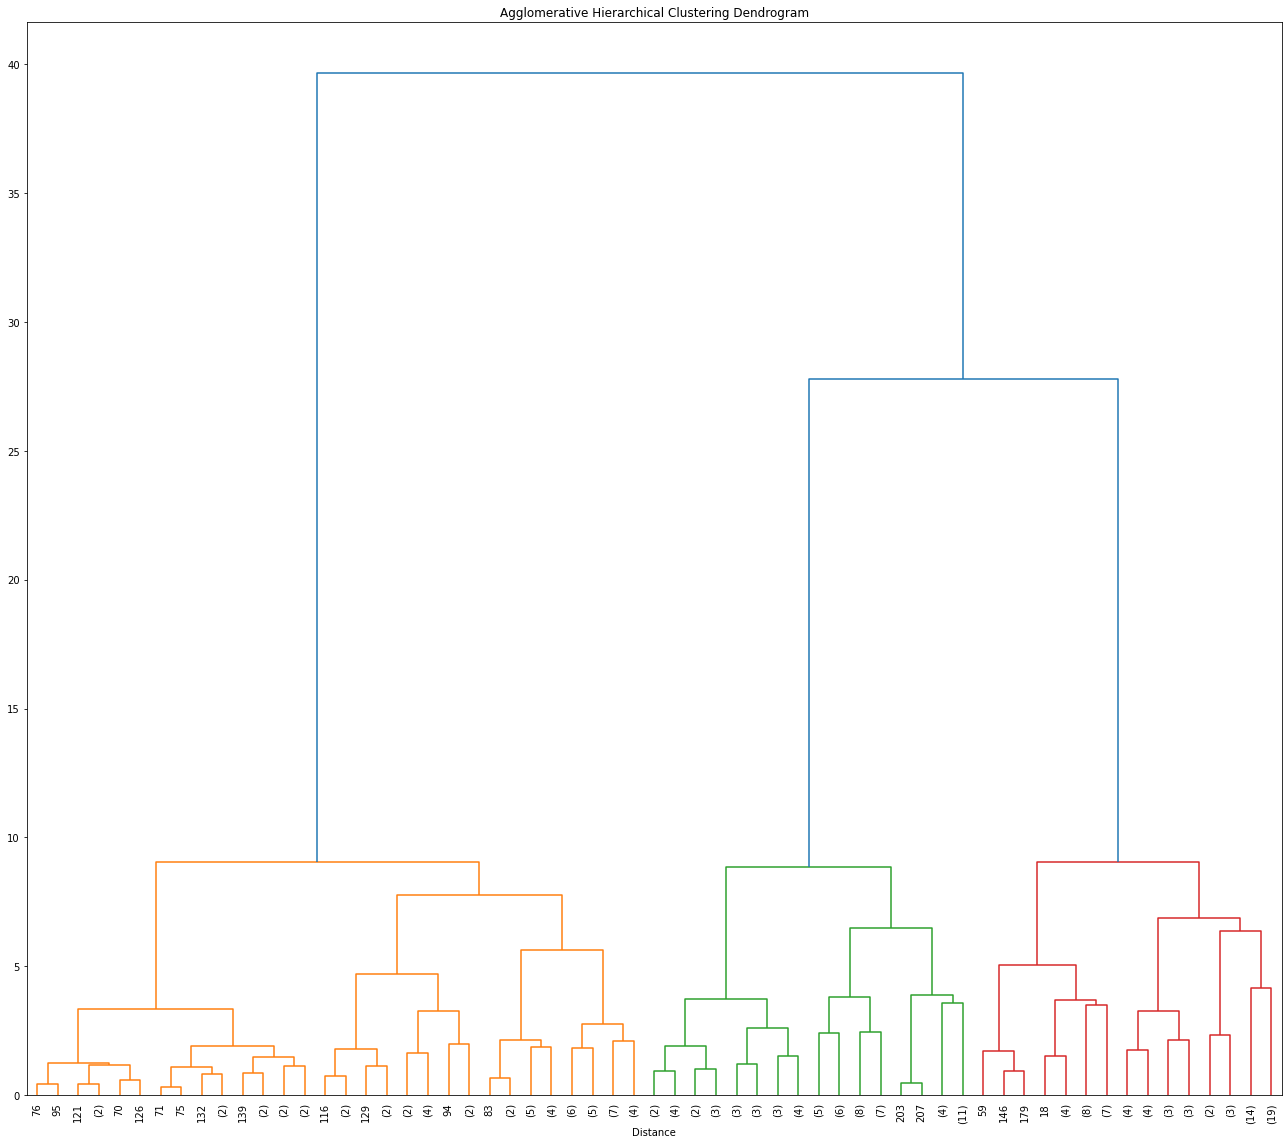

In [53]:
plt.figure(figsize=(18,16))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
z=linkage(X_std,'ward')
dendrogram(z,leaf_rotation=90.0,color_threshold=10,leaf_font_size=10,truncate_mode='level',p=5)
plt.tight_layout()

In [61]:
# Manually checking dedogram belongs to which class
X_std.iloc[126:127]#yellow in color

,Area,Perimeter,Compactness,Length_K,Width_K,Asymmety_Coef,Length_K_Groove,class
126,1.30995,1.420517,-0.050845,1.485194,0.890082,0.460541,1.415289,1


In [62]:
X_std.iloc[203:204]#green in color

,Area,Perimeter,Compactness,Length_K,Width_K,Asymmety_Coef,Length_K_Groove,class
203,-0.739821,-0.882135,0.695769,-1.007977,-0.444794,3.17059,-0.832274,0


In [63]:
X_std.iloc[146:147]#red in color

,Area,Perimeter,Compactness,Length_K,Width_K,Asymmety_Coef,Length_K_Groove,class
146,-1.177335,-1.097049,-1.590736,-1.023814,-1.432019,-0.986152,-0.563056,2
